In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import pandas as pd

### Loading Fashion MNIST Dataset

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
print("Shape of dataset : ",X_train_full.shape)
print("Datatype : ",X_train_full.dtype)
print("unique classes : ",np.unique(y_train_full))

Shape of dataset :  (60000, 28, 28)
Datatype :  uint8
unique classes :  [0 1 2 3 4 5 6 7 8 9]


### Creating validation split from train_full

In [11]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Scaling the input features for using Gradient Descent
For simplicity, we'll scale the pixel intensity down to the 0-1 range by dividing them by 255.0 (this also converts them to float)


#### Reason for dividing by 255:  

RGB (Red, Green, Blue) are 8bit each.   
Range of each individual color : 0-255 (2^8 = 256)
Combination range : 256*256*256
By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

In [12]:
X_valid, X_train = X_valid/255.0, X_train/255.0
print("Shape of training dataset : ",X_train.shape)
print("Shape of validation dataset : ",X_valid.shape)

Shape of training dataset :  (55000, 28, 28)
Shape of validation dataset :  (5000, 28, 28)


### Visualizing Dataset

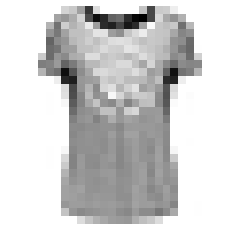

In [13]:
show_dress = X_train[1]
show_dress_image = show_dress.reshape(28,28)
plt.imshow(show_dress_image,cmap='binary' )
plt.axis("off")
plt.show()

In [14]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[1]]

'T-shirt/top'

### Creating Model using sequential API

This is the simplest kind of Keras model for neural networks that are just composed of single stack of layers connected sequentially. This is called the Sequential API

Below is a classification MLP (Multilayer Perceptron) with two hidden layers

In [15]:
model = keras.models.Sequential() #creates a sequential model
model.add(keras.layers.Flatten(input_shape=[28,28])) #Flatten layer whose role is to convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation = 'relu')) #Dense hidden layer with 300 neurons and use ReLU activation function.
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #Dense output layer with 10 neurons(one per class) using softmax activation function

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
layer = 1
weights, biases = model.layers[layer].get_weights()
print('Details of weights and baises of Layer '+str(layer) + ' named '+model.layers[layer].name)
print('Weights \n',weights)
print('Weights shape : ',weights.shape)
print('Biases \n',biases)
print('Biases shape : ',biases.shape)

Details of weights and baises of Layer 1 named dense
Weights 
 [[-0.0485252  -0.00666709  0.04780281 ...  0.02999005  0.02496266
   0.05014713]
 [-0.03519233 -0.05405066  0.02813303 ... -0.05485577  0.02776567
  -0.04820439]
 [ 0.00570751  0.03150199  0.06849165 ... -0.00464515 -0.03498201
  -0.0427017 ]
 ...
 [ 0.06629315 -0.00555647  0.03117781 ...  0.01353485 -0.03312794
   0.01047468]
 [ 0.00242058  0.03706374  0.02778912 ... -0.03872046  0.06402524
   0.00096854]
 [ 0.03474454  0.070732    0.0298762  ...  0.01078728  0.02407105
   0.02858867]]
Weights shape :  (784, 300)
Biases 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

#### Note: Here Dense layer initialized the connection weights randomly which is needed to break symmetry

### Compiling the model

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#### Reason for using sparse_categorical_crossentropy:   
If your Y's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

In [19]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0049 - accuracy: 0.6790 - val_loss: 0.5078 - val_accuracy: 0.8282
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4997 - accuracy: 0.8249 - val_loss: 0.4499 - val_accuracy: 0.8508
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4517 - accuracy: 0.8439 - val_loss: 0.4519 - val_accuracy: 0.8390
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4142 - accuracy: 0.8543 - val_loss: 0.4133 - val_accuracy: 0.8566
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3954 - accuracy: 0.8628 - val_loss: 0.3861 - val_accuracy: 0.8672
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8660 - val_loss: 0.3865 - val_accuracy: 0.8632
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8721 - val_loss: 0.3635 - val_accuracy:

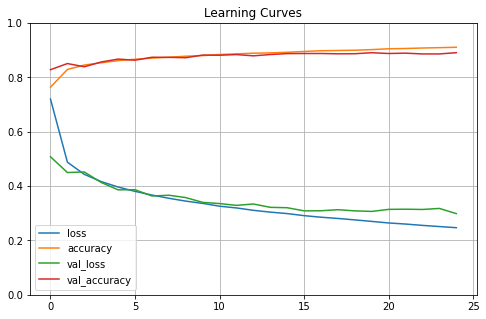

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Learning Curves')
plt.show()

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 59.2186 - accuracy: 0.8515


[59.218631744384766, 0.8514999747276306]

In [29]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\91888\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_act = y_test[:3]
y_act

array([9, 2, 1], dtype=uint8)